Below are some useful exercises to experiment on.

1) Empire States Random Walk by Dice Roll

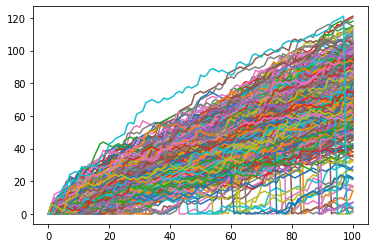

In [9]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1037655954)

# simulate random walk 500 times
walks = []

for i in range(500) :
    random_walk = [0]
    
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice < 3:
            step = max(0, step - 1)
        elif dice < 6:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    walks.append(random_walk)

# create and plot np_aw_t
np_aw_t = np.transpose(np.array(walks))
plt.clf()
plt.plot(np_aw_t)
plt.show()

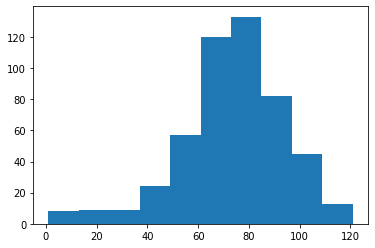

In [10]:
# select last row from np_aw_t: ends
ends = np_aw_t[-1,:]

# plot histogram of ends, display plot
plt.hist(ends)
plt.show()

In [13]:
# the probability of ending at the 60th floor or higher
print("Probability of ending at the 60th step or higher is:", str(round(((ends >= 60).sum() / 500) * 100, 2)) + "%")

Probability of ending at the 60th step or higher is: 79.6%


2) Manual Convolution to Filter Images

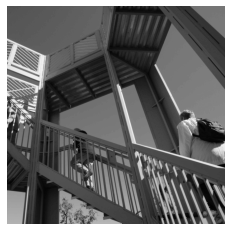

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

# load the ascent image
ascent_image = misc.ascent()

# visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [7]:
# copy image to a numpy array
np_image = np.copy(ascent_image)

# get the dimensions of the image
size_x = np_image.shape[0]
size_y = np_image.shape[1]

# filter image with provided kernels
# (edge detection) filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
# (y gradient sobel) filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# (sharpen) filter = [ [0, -1, 0], [-1, 5, -1], [0, -1, 0]]
# (x gradient sobel) 
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# all the digits in the filter must add up to 0 or 1, normalize with a weight if not
weight  = 1

In [8]:
# iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # multiply by weight for normalization
      convolution = convolution * weight   
      
      # check the boundaries of the pixel values
      if(convolution < 0):
        convolution = 0
      if(convolution > 255):
        convolution = 255

      # load into the transformed image
      np_image[x, y] = convolution

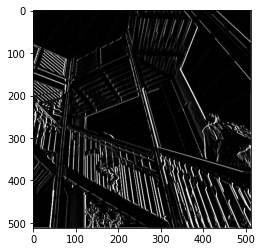

In [9]:
# plot the image. note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(np_image)
plt.show()   